# Requirements

In [2]:
!pip install -r /kaggle/input/dependency/requirements.txt

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 98.0 MB/s eta 0:00:00:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 91.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 103.1 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.3/548.3 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 10.2 MB/s eta 0:00:0000:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 102.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from wordcloud import WordCloud, STOPWORDS
import Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import preprocessor as p
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
import time
from sklearn.model_selection import GridSearchCV
import os
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


2025-05-31 11:26:03.909573: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-31 11:26:03.909639: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-31 11:26:03.911536: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Data Understanding

In [1]:
df = pd.read_csv('/kaggle/input/mental-health/Combined Data.csv')
df.tail()

NameError: name 'pd' is not defined

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


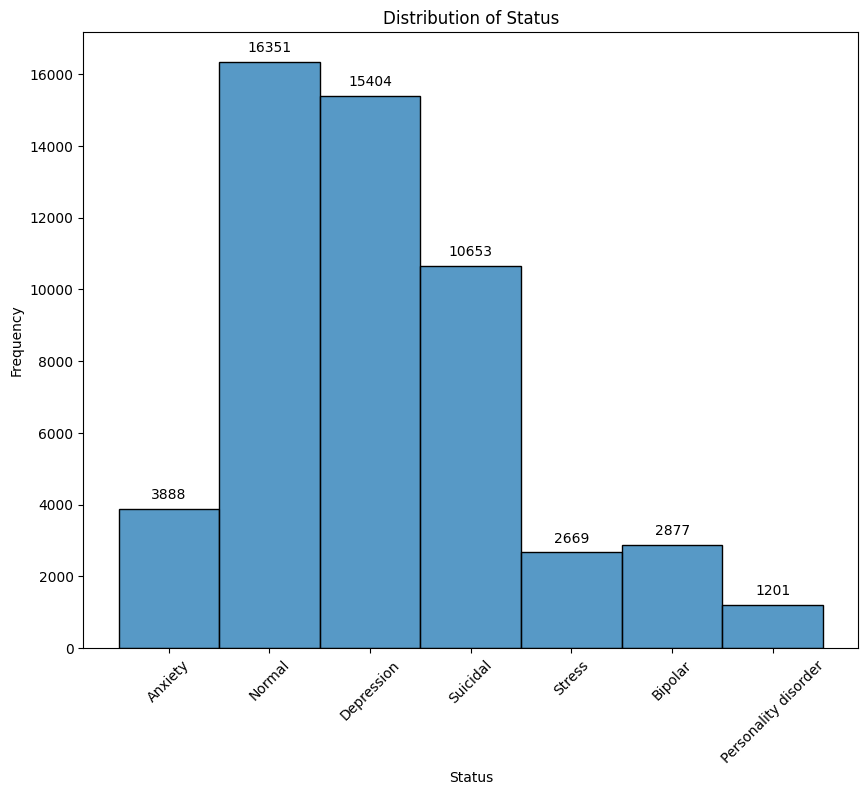

In [5]:
plt.figure(figsize=(10, 8)) # Set the figure size (width=10, height=6)
sns.histplot(df['status'])
plt.title('Distribution of Status')
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In [6]:
df.shape

(53043, 3)

In [7]:
df = df.drop('Unnamed: 0', axis=1)

In [9]:
df['statement_length'] = df['statement'].fillna('').apply(len)
df[['statement', 'statement_length']].head()

,statement,statement_length
0,oh my gosh,10
1,"trouble sleeping, confused mind, restless hear...",64
2,"All wrong, back off dear, forward doubt. Stay ...",78
3,I've shifted my focus to something else but I'...,61
4,"I'm restless and restless, it's been a month n...",72


In [10]:
df['statement_length'].describe()

count    53043.000000
mean       574.764342
std        844.721094
min          0.000000
25%         77.000000
50%        313.000000
75%        748.000000
max      32759.000000
Name: statement_length, dtype: float64

In [11]:
df[df['statement_length']==0]

,statement,status,statement_length
293,NaN,Anxiety,0
572,NaN,Anxiety,0
595,NaN,Anxiety,0
1539,NaN,Normal,0
2448,NaN,Normal,0
...,...,...,...
52838,NaN,Anxiety,0
52870,NaN,Anxiety,0
52936,NaN,Anxiety,0
53010,NaN,Anxiety,0


In [12]:
df[df['statement_length']==32759]

,statement,status,statement_length
13293,I cannot TAKE IT ANYMORE. I cannot TAKE IT ANY...,Suicidal,32759


In [13]:
df.isnull().sum()

statement           362
status                0
statement_length      0
dtype: int64

# Data Preparation

In [14]:
df.dropna(inplace=True)
df.isnull().sum()

statement           0
status              0
statement_length    0
dtype: int64

In [15]:
Q1 = df['statement_length'].quantile(0.25)

Q3 = df['statement_length'].quantile(0.75)

IQR = Q3 - Q1

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")

Q1: 80.0
Q3: 752.0
IQR: 672.0


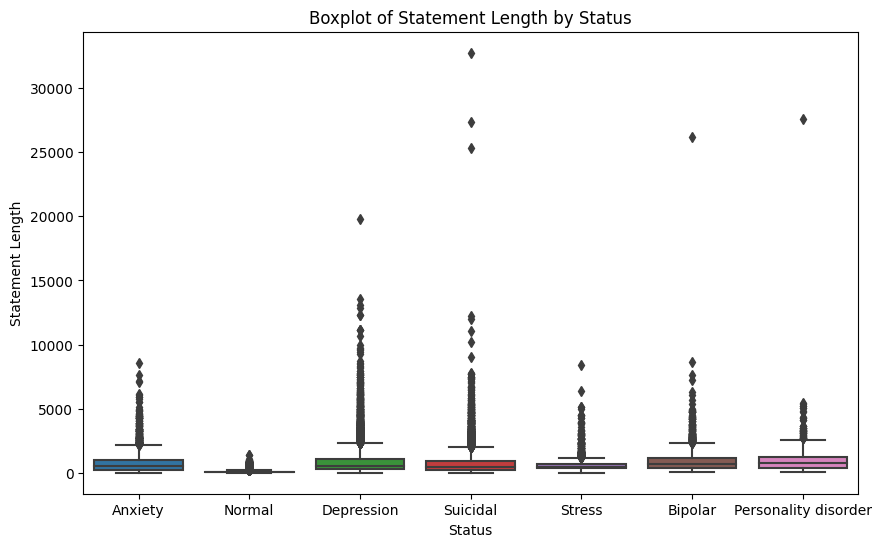

In [34]:
# prompt: boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='statement_length', data=df)
plt.title('Boxplot of Statement Length by Status')
plt.xlabel('Status')
plt.ylabel('Statement Length')
plt.show()

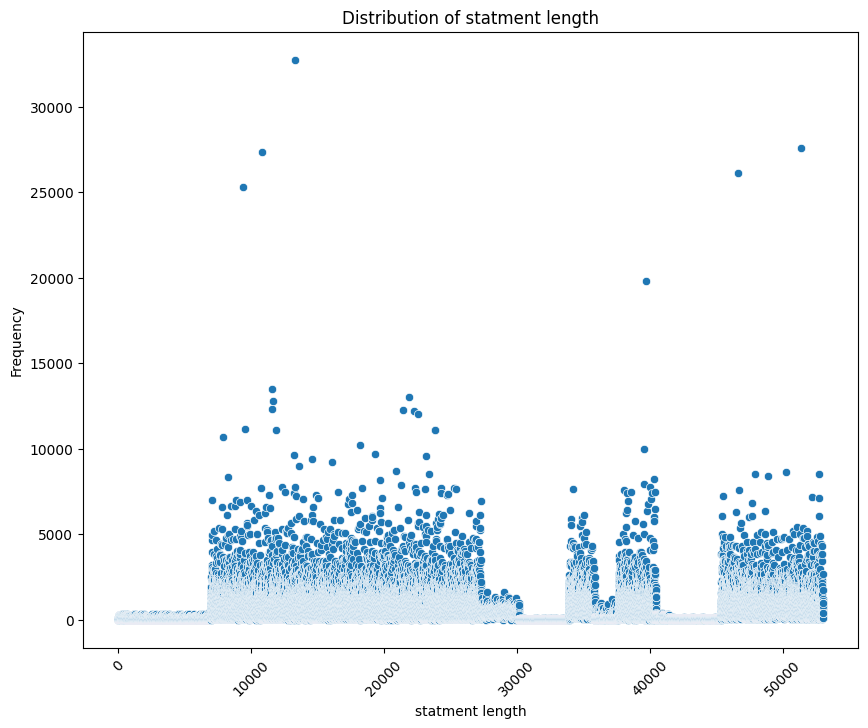

In [16]:
plt.figure(figsize=(10, 8)) # Set the figure size (width=10, height=6)
sns.scatterplot(df['statement_length'])
plt.title('Distribution of statment length')
plt.xlabel('statment length')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Lower Bound for Outliers: -928.0
Upper Bound for Outliers: 1760.0
Shape of original dataframe: (52681, 3)
Shape of filtered dataframe (after removing outliers): (49169, 3)


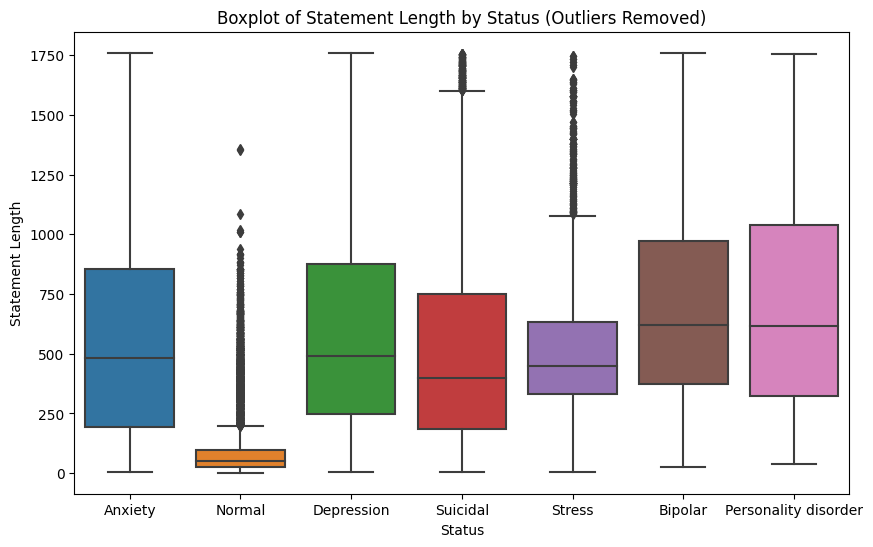

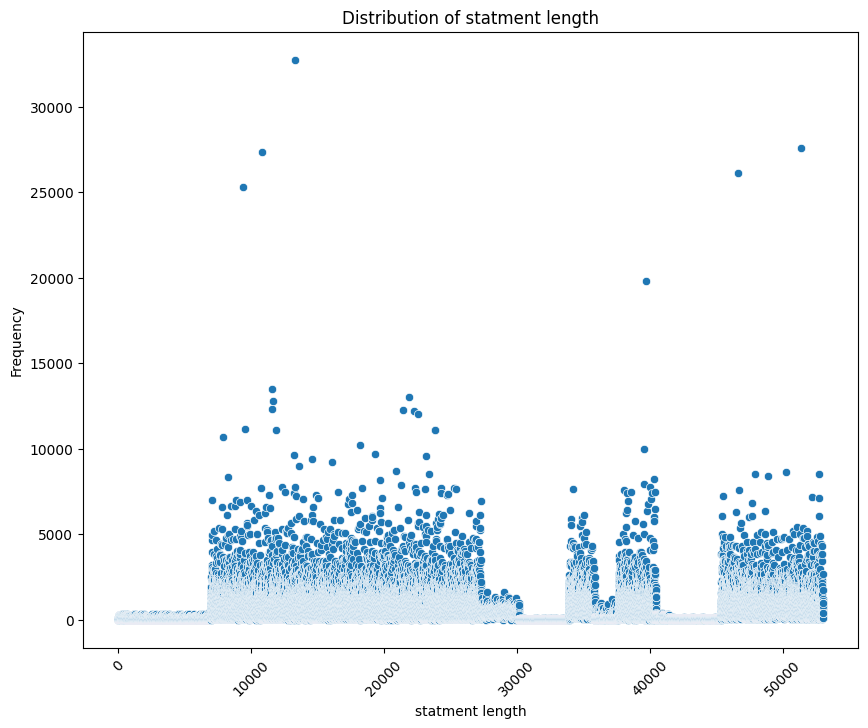

In [17]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}")

df_filtered = df[(df['statement_length'] >= lower_bound) & (df['statement_length'] <= upper_bound)]

print(f"Shape of original dataframe: {df.shape}")
print(f"Shape of filtered dataframe (after removing outliers): {df_filtered.shape}")

plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='statement_length', data=df_filtered)
plt.title('Boxplot of Statement Length by Status (Outliers Removed)')
plt.xlabel('Status')
plt.ylabel('Statement Length')
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(df['statement_length'])
plt.title('Distribution of statment length')
plt.xlabel('statment length')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

df = df_filtered

In [39]:

# Cek device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


# Load model MarianMT English to Indonesian
model_name = "Helsinki-NLP/opus-mt-en-id"
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name).to(device)

# Fungsi translate batch
def translate_batch(texts):
    try:
        inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True, max_length=256)
        inputs = {k: v.to(device) for k, v in inputs.items()}
        translated = model.generate(**inputs, max_length=256)
        outputs = tokenizer.batch_decode(translated, skip_special_tokens=True)
        return outputs
    except Exception as e:
        print(f"Error translating batch: {e}")
        return texts  # fallback ke teks asli jika gagal

# Siapkan data
statements = df['statement_cleaned'].fillna("").astype(str).tolist()
translated_texts = []
batch_size = 64

# Proses dengan progress bar
for i in tqdm(range(0, len(statements), batch_size), desc="Translating"):
    batch = statements[i:i+batch_size]
    translated_batch = translate_batch(batch)
    translated_texts.extend(translated_batch)

# Simpan hasil ke dataframe
df['statement_translated'] = translated_texts

# Simpan ke file baru
df.to_csv("dataset_translated.csv", index=False)

# Tampilkan hasil
print(df[['statement_cleaned', 'statement_translated']].head())

Using device: cuda


/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Translating: 100%|██████████| 769/769 [1:23:33<00:00,  6.52s/it]


                                   statement_cleaned  \
0                                         oh my gosh   
1  trouble sleeping confused mind restless heart ...   
2  all wrong back off dear forward doubt stay in ...   
3  ive shifted my focus to something else but im ...   
4  im restless and restless its been a month now ...   

                                statement_translated  
0                                         oh my gosh  
1  kesulitan tidur bingung pikiran gelisah hati s...  
2  semua salah mundur sayang ke depan keraguan ti...  
3  Aku telah mengalihkan fokusku ke sesuatu yang ...  
4  Im gelisah dan gelisah sudah sebulan sekarang ...  


# Merge Dataset

In [6]:
df1 = pd.read_csv('/kaggle/input/tambahan/depression-anxiety.csv')
df1.columns = ['statement', 'status','statement_translated']
df1

,statement,status,statement_translated
0,advice please hey everyone please help me im ...,stress,Saran tolong hei semuanya tolong bantu saya. S...
1,does anyone get anxious about something and th...,anxiety,Adakah yang cemas tentang sesuatu dan kemudian...
2,ocd is overwhelming me ocd is overwhelming me ...,anxiety,OCD membanjiri saya OCD\n\nSaya merasa tidak m...
3,i feel so drained and exhausted i am so tired ...,stress,Saya merasa sangat terkuras dan kelelahan sehi...
4,social anxiety i have had debilitating social...,anxiety,Kecemasan Sosial Saya telah mengalami kecemasa...
...,...,...,...
7419,really want kill myselfim questioning long ter...,stress,Benar -benar ingin membunuh diri saya sendiri ...
7420,girlfriend keeps making comments redflagdear r...,anxiety,Pacar terus membuat komentar Redflagdear RSW P...
7421,running optionsmy life general going downhill ...,anxiety,Pilihan berjalan saya kehidupan umum menuruni ...
7422,need support dealing lot stupid shit piling ag...,stress,Butuh dukungan berurusan banyak hal bodoh yang...


In [18]:
df2 = pd.read_csv('/kaggle/input/dataset-cleaned/dataset_cleaned (2).csv')
df2 = df2.drop('statement_cleaned',axis=1)
df2 = df2.drop('statement_stemming',axis=1)

In [19]:
df_translate = pd.concat([df1,df2], ignore_index=True)
df_translate['status'] = df_translate['status'].str.lower()
df_translate

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,statement,status,statement_translated,statement_length
0,advice please hey everyone please help me im ...,stress,Saran tolong hei semuanya tolong bantu saya. S...,NaN
1,does anyone get anxious about something and th...,anxiety,Adakah yang cemas tentang sesuatu dan kemudian...,NaN
2,ocd is overwhelming me ocd is overwhelming me ...,anxiety,OCD membanjiri saya OCD\n\nSaya merasa tidak m...,NaN
3,i feel so drained and exhausted i am so tired ...,stress,Saya merasa sangat terkuras dan kelelahan sehi...,NaN
4,social anxiety i have had debilitating social...,anxiety,Kecemasan Sosial Saya telah mengalami kecemasa...,NaN
...,...,...,...,...
56588,Lorazepam side effect/after effect In the last...,anxiety,efek samping lorazepam efek samping minggu men...,784.0
56589,"selfishness ""I don't feel very good, it's lik...",anxiety,keegoisan dunia berpikir teman teman bahagia i...,1012.0
56590,Is there any way to sleep better? I can't slee...,anxiety,tidur tidur obat malam membantu,85.0
56591,"Public speaking tips? Hi, all. I have to give ...",anxiety,tips berbicara publik hi presentasi kerja ming...,401.0


In [20]:
df_translate[['statement', 'statement_translated']] = df_translate[['statement', 'statement_translated']].astype(str)
df_translate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56593 entries, 0 to 56592
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   statement             56593 non-null  object 
 1   status                56593 non-null  object 
 2   statement_translated  56593 non-null  object 
 3   statement_length      49169 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.7+ MB


In [21]:
df_translate['statement_length'] = df_translate['statement_translated'].fillna('').apply(len)
df_translate

,statement,status,statement_translated,statement_length
0,advice please hey everyone please help me im ...,stress,Saran tolong hei semuanya tolong bantu saya. S...,928
1,does anyone get anxious about something and th...,anxiety,Adakah yang cemas tentang sesuatu dan kemudian...,307
2,ocd is overwhelming me ocd is overwhelming me ...,anxiety,OCD membanjiri saya OCD\n\nSaya merasa tidak m...,1037
3,i feel so drained and exhausted i am so tired ...,stress,Saya merasa sangat terkuras dan kelelahan sehi...,638
4,social anxiety i have had debilitating social...,anxiety,Kecemasan Sosial Saya telah mengalami kecemasa...,1071
...,...,...,...,...
56588,Lorazepam side effect/after effect In the last...,anxiety,efek samping lorazepam efek samping minggu men...,322
56589,"selfishness ""I don't feel very good, it's lik...",anxiety,keegoisan dunia berpikir teman teman bahagia i...,621
56590,Is there any way to sleep better? I can't slee...,anxiety,tidur tidur obat malam membantu,31
56591,"Public speaking tips? Hi, all. I have to give ...",anxiety,tips berbicara publik hi presentasi kerja ming...,158


In [22]:
def clean_text(text):
  text = re.sub(r'http\S+', '', text)
  text = re.sub(r'pic.twitter.com\S+', '', text)
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)
  text = re.sub(r'#\w+', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?://\S+', '', text)
  text = re.sub(r'\d+', '', text)
  text = re.sub(r'-', ' ', text)
  text = re.sub(r'[^A-Za-z0-9 ]', '', text)
  text = re.sub(r'\s+', ' ', text).strip()
  return text.lower()
def remove_stopwords(text, exclude_words=[]):
       # Handle float values
       if isinstance(text, float):
           text = str(text)  # Convert float to string
       tokens = word_tokenize(text.lower())
       filtered_tokens = [token for token in tokens if token not in stopwords.words('indonesian') or token in exclude_words]
       processed_text = ' '.join(filtered_tokens)
       return processed_text

def stemming(text, exclude_words=[]):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  words = word_tokenize(text)
  stemmed_words = [word if word in exclude_words else stemmer.stem(word) for word in words]
  stemmed_text = " ".join(stemmed_words)
  return stemmed_text

In [23]:
df_translate['statement_translated'] = df_translate['statement_translated'].apply(clean_text)
# df_translate['statement_cleaned'] = df_translate['statement_translated'].apply(remove_stopwords)
# df_translate['statement_cleaned'] = df_translate['statement_translated'].apply(stemming)

In [24]:
df_translate.to_csv('/kaggle/working/capston-dataset-fix')
df_translate

,statement,status,statement_translated,statement_length
0,advice please hey everyone please help me im ...,stress,saran tolong hei semuanya tolong bantu saya sa...,928
1,does anyone get anxious about something and th...,anxiety,adakah yang cemas tentang sesuatu dan kemudian...,307
2,ocd is overwhelming me ocd is overwhelming me ...,anxiety,ocd membanjiri saya ocdsaya merasa tidak mungk...,1037
3,i feel so drained and exhausted i am so tired ...,stress,saya merasa sangat terkuras dan kelelahan sehi...,638
4,social anxiety i have had debilitating social...,anxiety,kecemasan sosial saya telah mengalami kecemasa...,1071
...,...,...,...,...
56588,Lorazepam side effect/after effect In the last...,anxiety,efek samping lorazepam efek samping minggu men...,322
56589,"selfishness ""I don't feel very good, it's lik...",anxiety,keegoisan dunia berpikir teman teman bahagia i...,621
56590,Is there any way to sleep better? I can't slee...,anxiety,tidur tidur obat malam membantu,31
56591,"Public speaking tips? Hi, all. I have to give ...",anxiety,tips berbicara publik hi presentasi kerja ming...,158


# Splitting Dataset

In [25]:
df_translate = pd.read_csv('/kaggle/working/capston-dataset-fix')
df_translate = df_translate.drop('Unnamed: 0',axis = 1)
df_translate

,statement,status,statement_translated,statement_length
0,advice please hey everyone please help me im ...,stress,saran tolong hei semuanya tolong bantu saya sa...,928
1,does anyone get anxious about something and th...,anxiety,adakah yang cemas tentang sesuatu dan kemudian...,307
2,ocd is overwhelming me ocd is overwhelming me ...,anxiety,ocd membanjiri saya ocdsaya merasa tidak mungk...,1037
3,i feel so drained and exhausted i am so tired ...,stress,saya merasa sangat terkuras dan kelelahan sehi...,638
4,social anxiety i have had debilitating social...,anxiety,kecemasan sosial saya telah mengalami kecemasa...,1071
...,...,...,...,...
56588,Lorazepam side effect/after effect In the last...,anxiety,efek samping lorazepam efek samping minggu men...,322
56589,"selfishness ""I don't feel very good, it's lik...",anxiety,keegoisan dunia berpikir teman teman bahagia i...,621
56590,Is there any way to sleep better? I can't slee...,anxiety,tidur tidur obat malam membantu,31
56591,"Public speaking tips? Hi, all. I have to give ...",anxiety,tips berbicara publik hi presentasi kerja ming...,158


In [26]:
df_translate['statement_stemming'] = df_translate['statement_translated'].apply(remove_stopwords)

In [ ]:
df_translate['statement_stemming'] = df_translate['statement_translated'].apply(stemming)

In [28]:
numeric_cols_data = df_translate.select_dtypes(include=['number']).columns.tolist()
# Fungsi detect_outliers_iqr tetap sama
def detect_outliers_iqr(df, features):
    outlier_summary = {}
    for col in features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outlier_summary[col] = outliers
    return pd.Series(outlier_summary)

print("Outlier count in data:")
print(detect_outliers_iqr(df_translate, numeric_cols_data))

Outlier count in data:
statement_length    3371
dtype: int64


In [29]:
# Menghapus outlier pada setiap fitur yang dipilih menggunakan metode IQR
def remove_outliers_iqr(df, features):
    df_clean = df.copy()
    for col in features:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean.reset_index(drop=True)

df_translate = remove_outliers_iqr(df_translate, numeric_cols_data)

print("Data without outliers: ", df_translate.shape)

Data without outliers:  (53222, 5)


In [30]:
df_translate['status'].value_counts()

status
normal                  16342
depression              13703
suicidal                 9652
anxiety                  6143
stress                   3996
bipolar                  2439
personality disorder      947
Name: count, dtype: int64

In [31]:
statuses_to_keep = ['depression', 'anxiety', 'stress', 'normal']
df_translate = df_translate[df_translate['status'].isin(statuses_to_keep)]
print(df_translate['status'].value_counts())
print(df_translate.isna().sum())

status
normal        16342
depression    13703
anxiety        6143
stress         3996
Name: count, dtype: int64
statement                 0
status                    0
statement_translated    438
statement_length          0
statement_stemming        0
dtype: int64


In [32]:
df_translate.dropna(inplace = True)
print(df_translate.isna().sum())

statement               0
status                  0
statement_translated    0
statement_length        0
statement_stemming      0
dtype: int64


In [33]:
df_translate.to_csv('/kaggle/working/capstone-dataset-fix-stemming')

In [5]:
df_translate = pd.read_csv('/kaggle/input/capstone-dataset-stemming/capstone-dataset-fix-stemming.csv')
df_translate = df_translate.drop('Unnamed: 0',axis = 1)
df_translate[['statement_stemming']] = df_translate[['statement_stemming']].astype(str)
df_translate

,statement,status,statement_translated,statement_length,statement_stemming
0,does anyone get anxious about something and th...,anxiety,adakah yang cemas tentang sesuatu dan kemudian...,307,adakah cemas lupa cemas cemas mencoba judulnya...
1,i feel so drained and exhausted i am so tired ...,stress,saya merasa sangat terkuras dan kelelahan sehi...,638,terkuras kelelahan lelah serangan panik kecema...
2,help with constant fatigue ever since i start...,stress,bantuan dengan kelelahan konstan sejak saya mu...,610,bantuan kelelahan konstan menderita gad panic ...
3,panic attacks when trying to sleep me 10m have...,stress,serangan panik ketika mencoba tidur saya m bar...,433,serangan panik mencoba tidur m mengalami seran...
4,anxiety help hello so i have maybe had like 3 ...,anxiety,kecemasan membantu halo jadi saya mungkin memi...,362,kecemasan membantu halo memiliki serangan pani...
...,...,...,...,...,...
39741,Lorazepam side effect/after effect In the last...,anxiety,efek samping lorazepam efek samping minggu men...,322,efek samping lorazepam efek samping minggu men...
39742,"selfishness ""I don't feel very good, it's lik...",anxiety,keegoisan dunia berpikir teman teman bahagia i...,621,keegoisan dunia berpikir teman teman bahagia i...
39743,Is there any way to sleep better? I can't slee...,anxiety,tidur tidur obat malam membantu,31,tidur tidur obat malam membantu
39744,"Public speaking tips? Hi, all. I have to give ...",anxiety,tips berbicara publik hi presentasi kerja ming...,158,tips berbicara publik hi presentasi kerja ming...


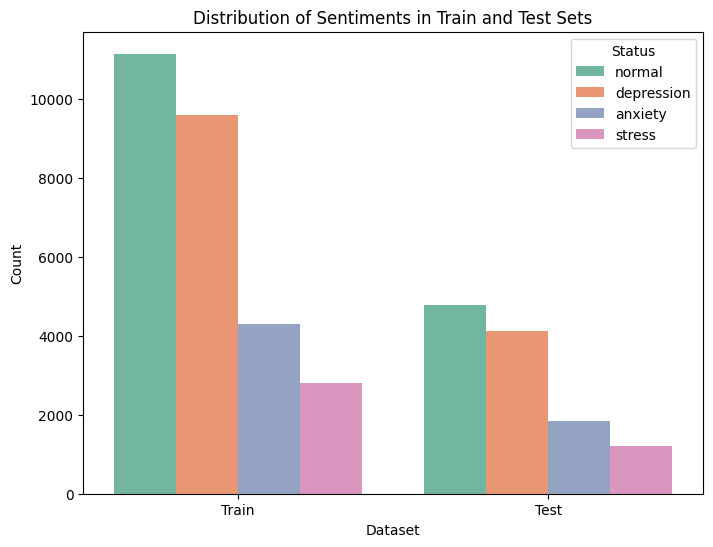

In [11]:
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

for train_index, test_index in strat_split.split(df_translate['statement_stemming'], df_translate['status']):
    X_train, X_test = df_translate['statement_stemming'].iloc[train_index], df_translate['statement_stemming'].iloc[test_index]
    y_train, y_test = df_translate['status'].iloc[train_index], df_translate['status'].iloc[test_index]

data = {
    'Set': ['Train'] * len(y_train) + ['Test'] * len(y_test),
    'Status': list(y_train) + list(y_test)
}

df_visualization = pd.DataFrame(data)
plt.figure(figsize=(8, 6))
sns.countplot(x='Set', hue='Status', data=df_visualization, palette='Set2')
plt.title('Distribution of Sentiments in Train and Test Sets')
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.show()

In [12]:
from imblearn.over_sampling import SMOTE
# Assuming tweets_df is your DataFrame and it has 'full_text' and 'sentiment' columns
# Assuming you have already done the train-test split and have X_train, X_test, y_train, y_test
# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_vec, y_train)
# You can now use X_train_smote and y_train_smote for training your model

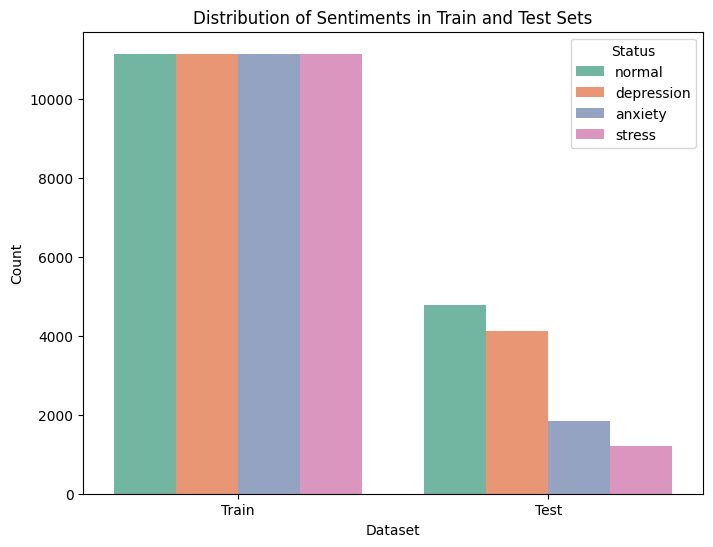

In [13]:
data = {
    'Set': ['Train'] * len(y_train_smote) + ['Test'] * len(y_test),
    'Status': list(y_train_smote) + list(y_test)
}

df_visualization = pd.DataFrame(data)
plt.figure(figsize=(8, 6))
sns.countplot(x='Set', hue='Status', data=df_visualization, palette='Set2')
plt.title('Distribution of Sentiments in Train and Test Sets')
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.show()

In [21]:
df_translate['status'].unique()

array(['anxiety', 'stress', 'normal', 'depression'], dtype=object)

# SVM

In [38]:
from sklearn.model_selection import GridSearchCV

start_time = time.time()
# Define the parameter grid
param_grid = {
    'C': [0.1,1,10],
    'gamma': [1,0.1,0.01,0.001],
    'kernel': ['rbf'],
}
# Create GridSearchCV object
grid_search = GridSearchCV(SVC(),param_grid,cv=5,scoring='accuracy',verbose=2,n_jobs=-1)
# Fit the model
grid_search.fit(X_train_smote, y_train_smote)
# Get the best parameters and estimator
best_params = grid_search.best_params_
best_svm_model = grid_search.best_estimator_
print(f"Best Parameters: {best_params}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 7.9min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=10.1min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=12.1min
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=12.0min
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=11.6min
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=11.2min
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time= 6.2min
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time= 9.9min
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=12.1min
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=11.7min
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=13.7min
[CV] END ........................C=10, gamma=0.1

Akurasi (SVM): 83%

Classification Report (SVM):
               precision    recall  f1-score   support

     anxiety       0.79      0.74      0.77      1843
  depression       0.82      0.88      0.84      4109
      normal       0.88      0.93      0.90      4773
      stress       0.67      0.44      0.53      1199

    accuracy                           0.83     11924
   macro avg       0.79      0.75      0.76     11924
weighted avg       0.83      0.83      0.83     11924



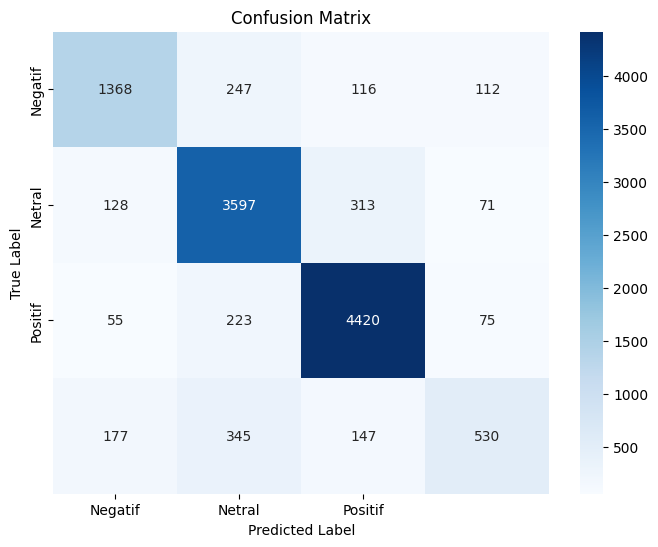

In [14]:
svm_model = SVC(kernel='rbf',gamma=1,C=10)
svm_model.fit(X_train_smote, y_train_smote)

# Make predictions
svm_predictions = svm_model.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, svm_predictions)
print(f"Akurasi (SVM): {accuracy * 100:.0f}%")
print("\nClassification Report (SVM):\n", classification_report(y_test, svm_predictions))


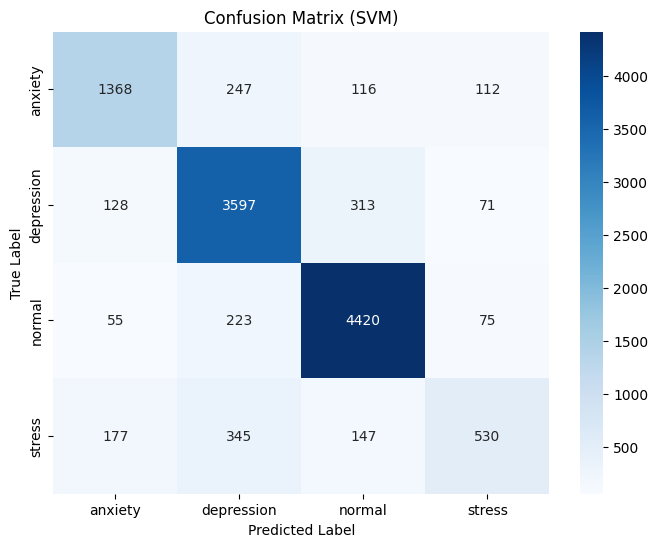

In [43]:
unique_labels = np.unique(y_test)
conf_matrix = confusion_matrix(y_test, svm_predictions, labels=unique_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=unique_labels,
            yticklabels=unique_labels)
plt.title("Confusion Matrix (SVM)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [22]:
def test_model(model, vectorizer, test_data):
    test_data_vectorized = vectorizer.transform(test_data)
    predictions = model.predict(test_data_vectorized)
    return predictions

user_input = "kadang aku takut banget sama masa depan takut nanti gabisa jadi apa apa takut nyusahin orang tua takut diremehin orang lain aku pengen bunuh dari aja"

# Make prediction
prediction = test_model(svm_model, vectorizer, [user_input])[0]
# Print the prediction
print(f"Prediksi sentimen (SVM): {prediction}")

print(f"teks: {user_input}")

Prediksi sentimen (SVM): depression
teks: kadang aku takut banget sama masa depan takut nanti gabisa jadi apa apa takut nyusahin orang tua takut diremehin orang lain aku pengen bunuh dari aja


In [24]:
import joblib

# Assume svm_model is your trained model
joblib.dump(svm_model, 'svm_model-tuning.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

# LSTM

In [6]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional,Input,GlobalMaxPooling1D
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import load_model
from keras.utils import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.model_selection import train_test_split

# Misal: df berisi 2 kolom utama: "text" dan "label"
X = df_translate['statement_stemming']              # Fitur teks
y = df_translate['status']             # Label emosi/sentimen

# Split: 80% train, 20% test (stratify agar distribusi label seimbang)
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [8]:
# Tokenizer dan padding seperti sebelumnya
tokenizer_lstm = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer_lstm.fit_on_texts(X_train_lstm)

X_train_seq = tokenizer_lstm.texts_to_sequences(X_train_lstm)
X_test_seq = tokenizer_lstm.texts_to_sequences(X_test_lstm)

max_sequence_length = 777  # atau sesuai panjang rata-rata teksmu
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

In [15]:
# Label Encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_lstm)
y_test_encoded = label_encoder.transform(y_test_lstm)


In [10]:
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_encoded),
    y=y_train_encoded
)

# Konversi ke dictionary
class_weight_dict = dict(enumerate(class_weights))
print(class_weight_dict)


{0: 1.6179523712599226, 1: 0.7254060960029203, 2: 0.6245285983658077, 3: 2.4863934939005317}


In [12]:
# Build LSTM model
n_classes = len(np.unique(y_train_encoded))

model_lstm = Sequential([
    Input(shape=(max_sequence_length,)),
    Embedding(input_dim=5000, output_dim=128),
    Bidirectional(LSTM(64, return_sequences=False, dropout=0.3)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(n_classes, activation='softmax')  # Fix di sini
])

model_lstm.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model_lstm.summary()



# model_lstm = Sequential([
#     Input(shape=(max_sequence_length,)),

#     # Embedding layer bisa ditambahkan regulasi atau load FastText (opsional)
#     Embedding(input_dim=5000, output_dim=128),

#     # LSTM + Bidirectional + dropout
#     Bidirectional(LSTM(
#         64,
#         return_sequences=False,
#         dropout=0.3,            # dropout input
#         recurrent_dropout=0.2,  # dropout state
#         kernel_regularizer=l2(1e-4)  # L2 regularisasi
#     )),

#     Dense(64, activation='relu', kernel_regularizer=l2(1e-4)),
#     Dropout(0.5),

#     Dense(7, activation='softmax')
# ])

# model_lstm.compile(
#     loss='sparse_categorical_crossentropy',
#     optimizer='adam',
#     metrics=['accuracy']
# )
# model_lstm.summary()



# model_lstm = Sequential([
#     Input(shape=(max_sequence_length,)),
#     Embedding(input_dim=5000, output_dim=128),
#     Bidirectional(LSTM(64, return_sequences=True, dropout=0.3)),
#     GlobalMaxPooling1D(),
#     Dense(64, activation='relu', kernel_regularizer=l2(1e-4)),
#     Dropout(0.5),
#     Dense(4, activation='softmax') 
# ])

# model_lstm.compile(
#     loss='sparse_categorical_crossentropy',
#     optimizer='adam',
#     metrics=['accuracy']
# )

# model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 777, 128)          640000    
                                                                 
 bidirectional_2 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                 260       
                                                                 
Total params: 747332 (2.85 MB)
Trainable params: 747332 (2.85 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [13]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_lstm_model.h5", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, min_lr=1e-5, verbose=1)


history = model_lstm.fit(
    X_train_pad, y_train_encoded,
    validation_split=0.2,
    epochs=15,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=[early_stop, checkpoint, reduce_lr]
)

Epoch 1/15
795/795 [==============================] - ETA: 0s - loss: 0.8612 - accuracy: 0.7162
Epoch 1: val_accuracy improved from -inf to 0.79230, saving model to best_lstm_model.h5
795/795 [==============================] - 390s 484ms/step - loss: 0.8612 - accuracy: 0.7162 - val_loss: 0.5971 - val_accuracy: 0.7923 - lr: 0.0010
Epoch 2/15


/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


795/795 [==============================] - ETA: 0s - loss: 0.6042 - accuracy: 0.8272
Epoch 2: val_accuracy improved from 0.79230 to 0.79497, saving model to best_lstm_model.h5
795/795 [==============================] - 379s 477ms/step - loss: 0.6042 - accuracy: 0.8272 - val_loss: 0.5679 - val_accuracy: 0.7950 - lr: 0.0010
Epoch 3/15
795/795 [==============================] - ETA: 0s - loss: 0.4890 - accuracy: 0.8606
Epoch 3: val_accuracy improved from 0.79497 to 0.82154, saving model to best_lstm_model.h5
795/795 [==============================] - 388s 488ms/step - loss: 0.4890 - accuracy: 0.8606 - val_loss: 0.5334 - val_accuracy: 0.8215 - lr: 0.0010
Epoch 4/15
795/795 [==============================] - ETA: 0s - loss: 0.4140 - accuracy: 0.8841
Epoch 4: val_accuracy did not improve from 0.82154
795/795 [==============================] - 395s 497ms/step - loss: 0.4140 - accuracy: 0.8841 - val_loss: 0.5784 - val_accuracy: 0.8132 - lr: 0.0010
Epoch 5/15
795/795 [==========================

249/249 [==============================] - 25s 98ms/step - loss: 0.5166 - accuracy: 0.8263
Test Accuracy: 82.63%
249/249 [==============================] - 26s 99ms/step

Classification Report (LSTM):
               precision    recall  f1-score   support

     anxiety       0.76      0.75      0.76      1229
  depression       0.86      0.82      0.84      2740
      normal       0.91      0.91      0.91      3182
      stress       0.52      0.62      0.56       799

    accuracy                           0.83      7950
   macro avg       0.76      0.78      0.77      7950
weighted avg       0.83      0.83      0.83      7950



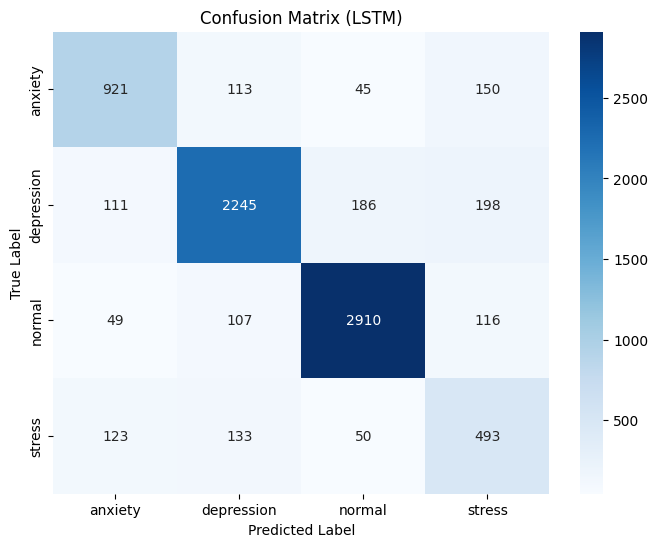

In [17]:
loss, accuracy = model_lstm.evaluate(X_test_pad, y_test_encoded)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Prediksi dan laporan evaluasi
pred_probs = model_lstm.predict(X_test_pad)
pred_classes = pred_probs.argmax(axis=1)
rnn_predictions = label_encoder.inverse_transform(pred_classes)

# Classification Report
print("\nClassification Report (LSTM):\n", classification_report(y_test_lstm, rnn_predictions))

# Confusion Matrix
cm = confusion_matrix(y_test_lstm, rnn_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix (LSTM)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


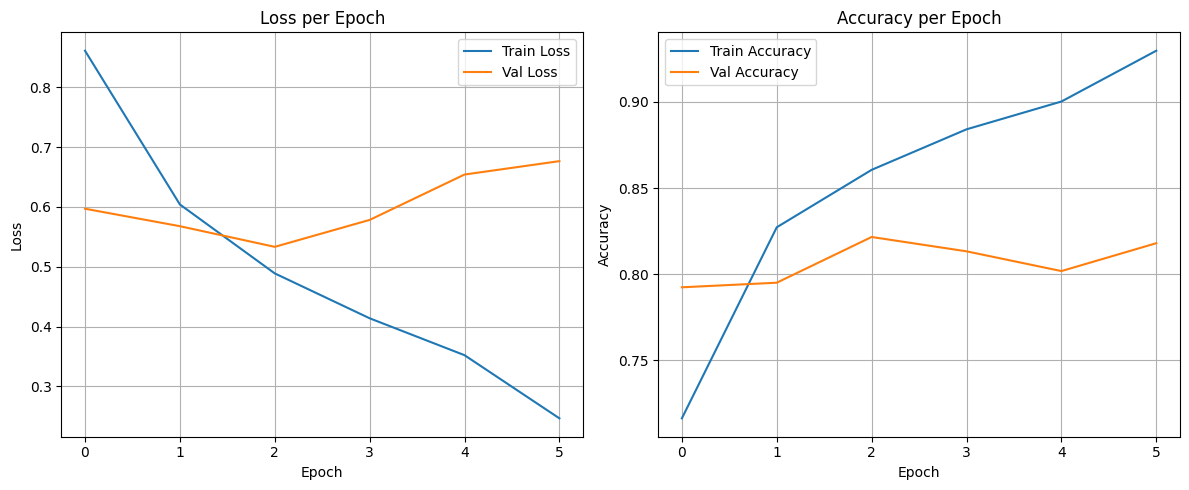

In [18]:
# Plot Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [19]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

def predict_emotion(text, model, tokenizer, label_encoder, max_len=777):
    # Preprocessing teks
    seq = tokenizer.texts_to_sequences([text])
    pad = pad_sequences(seq, maxlen=max_len, padding='post', truncating='post')

    # Prediksi
    probs = model.predict(pad)[0]  # hasil softmax
    pred_class = np.argmax(probs)
    label = label_encoder.inverse_transform([pred_class])[0]
    confidence = probs[pred_class] * 100

    return {
        "text": text,
        "predicted_label": label,
        "confidence": round(confidence, 2),
        "probabilities": dict(zip(label_encoder.classes_, map(lambda x: round(x*100, 2), probs)))
    }


In [1]:
model = tf.keras.models.load_model("lstm_model_tuning.h5")

NameError: name 'tf' is not defined

In [16]:
import pickle
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)
# Simpan tokenizer ke file
with open('tokenizer_lstm.pkl', 'wb') as f:
    pickle.dump(tokenizer_lstm, f)

In [20]:
import pickle
model1 = load_model('/kaggle/input/lstm-model/best_lstm_model_tuning.h5')
with open('tokenizer_lstm.pkl', 'rb') as f:
    loaded_tokenizer = pickle.load(f)

# Prediksi
example_text = "aku baik baik saja aku kuat namun aku sering merasa sedih dan menangis secara tiba-tiba tanpa sebab jingga ingin bunuh diri dan mengakhiri hidup"
result = predict_emotion(example_text, model1, loaded_tokenizer, label_encoder)

# Output
print(f"Teks: {result['text']}")
print(f"Prediksi Emosi: {result['predicted_label']} ({result['confidence']}%)")
print("Probabilitas Semua Kelas:")
for k, v in result["probabilities"].items():
    print(f"  {k}: {v}%")

1/1 [==============================] - 1s 996ms/step
Teks: aku baik baik saja aku kuat namun aku sering merasa sedih dan menangis secara tiba-tiba tanpa sebab jingga ingin bunuh diri dan mengakhiri hidup
Prediksi Emosi: anxiety (54.66%)
Probabilitas Semua Kelas:
  anxiety: 54.66%
  depression: 11.1%
  normal: 20.63%
  stress: 13.61%
